# Fine-tune decision threshold for Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report
import joblib

## Load model and data

In [3]:
model = joblib.load("C:/projects/Customer-churn-predictor/models/logistic_regression.pkl")
scaler = joblib.load("C:/projects/Customer-churn-predictor/models/scaler.pkl")
data = pd.read_csv("C:/projects/Customer-churn-predictor/data/Processed/telco_churn_clean.csv")

## Split into features and target

In [4]:
x = data.drop("Churn", axis=1)
y = data["Churn"]

## Scale

In [5]:
x_scaled = scaler.transform(x)

## Get predicted probabilities

In [6]:
y_probs = model.predict_proba(x_scaled)[:, 1]

# Compute precision, recall, thresholds


## Compute precision, recall, thresholds

In [7]:
precision, recall, thresholds = precision_recall_curve(y, y_probs)

## plot trade-off

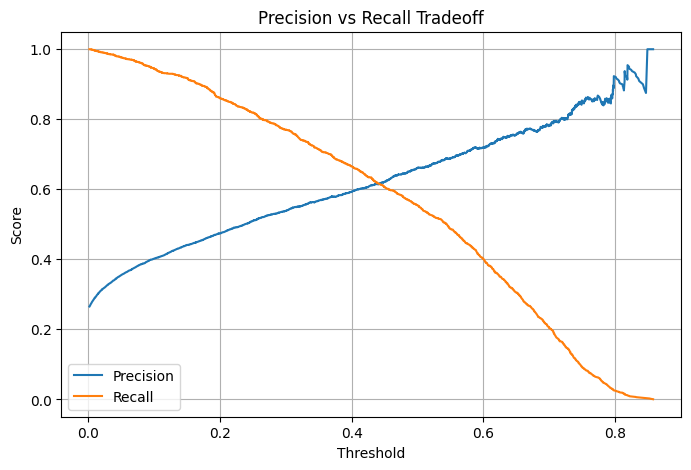

In [8]:
plt.figure(figsize=(8,5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall Tradeoff")
plt.legend()
plt.grid()
plt.show()

# Find best threshold where both are balanced

In [11]:
f1_scores = 2 * (precision * recall) / (precision + recall)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {precision[best_index]:.2f}, Recall: {recall[best_index]:.2f}")

Best Threshold: 0.31
Precision: 0.55, Recall: 0.76


# Evaluate model at that threshold

In [10]:
y_pred_custom = (y_probs >= best_threshold).astype(int)
print("\nClassification Report (custom threshold):")
print(classification_report(y, y_pred_custom))


Classification Report (custom threshold):
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      5174
           1       0.55      0.76      0.64      1869

    accuracy                           0.77      7043
   macro avg       0.72      0.77      0.73      7043
weighted avg       0.81      0.77      0.78      7043

